In [1]:
import pandas as pd # Importando biblioteca pandas
import requests # Importando biblioteca requests para fazer requisições HTTP

from bs4 import BeautifulSoup # Importando biblioteca BeautifulSoup para parsear HTML

In [ ]:
csv_url = 'https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv' # URL do dataset
df_csv = pd.read_csv(csv_url) # Lendo o dataset
df_csv.head() # Exibindo as primeiras linhas do dataset
df_csv.columns # Exibindo os nomes das colunas do dataset

Index(['Index', ' Height(Inches)"', ' "Weight(Pounds)"'], dtype='object')

In [53]:
response = requests.get('https://jsonplaceholder.typicode.com/users') # Fazendo a requisição HTTP
users = response.json() # Converte a resposta JSON para um dicionário
df_users = pd.DataFrame(users) # Converte o dicionário para um DataFrame
df_users.columns # Exibindo os nomes das colunas do DataFrame
dff = df_users[['name', 'email', 'phone']] # Selecionando as colunas 'name' e 'email' do DataFrame
print(dff) # Exibindo as primeiras linhas do DataFrame de citações
print('\n', (75 * '=').center(75), '\n') # Exibindo uma divisória

df_filtrado = dff[dff['name'].str.startswith('C')] # Filtrando o DataFrame por nomes iniciando com 'C'
print(df_filtrado) # Exibindo as primeiras linhas do DataFrame filtrado

print('\n', (75 * '=').center(75), '\n') # Exibindo uma divisória

# Obs: Se Não tiver registro com o e-mail 'dana.io', o DataFrame filtrado2 não retornará nenhuma linha.
df_filtrado2 = dff[dff['email'].str.endswith('@dana.io')] # Filtrando o DataFrame por nomes que contêm '@gmail.com'
print(df_filtrado2) # Exibindo as primeiras linhas do DataFrame filtrado

dff.to_csv('user.csv', index=False) # Salvando o DataFrame em um CSV com nome 'user.csv'
df_carregado = pd.read_csv('user.csv') # Carregando o DataFrame salvo anteriormente



                       name                      email                  phone
0             Leanne Graham          Sincere@april.biz  1-770-736-8031 x56442
1              Ervin Howell          Shanna@melissa.tv    010-692-6593 x09125
2          Clementine Bauch         Nathan@yesenia.net         1-463-123-4447
3          Patricia Lebsack  Julianne.OConner@kory.org      493-170-9623 x156
4          Chelsey Dietrich   Lucio_Hettinger@annie.ca          (254)954-1289
5      Mrs. Dennis Schulist    Karley_Dach@jasper.info   1-477-935-8478 x6430
6           Kurtis Weissnat     Telly.Hoeger@billy.biz           210.067.6132
7  Nicholas Runolfsdottir V       Sherwood@rosamond.me      586.493.6943 x140
8           Glenna Reichert    Chaim_McDermott@dana.io   (775)976-6794 x41206
9        Clementina DuBuque     Rey.Padberg@karina.biz           024-648-3804


                 name                     email           phone
2    Clementine Bauch        Nathan@yesenia.net  1-463-123-4447
4    Chelsey

In [ ]:
url = 'https://quotes.toscrape.com/' # URL da página de citações
response = requests.get(url) # Fazendo a requisição HTTP
soup = BeautifulSoup(response.text, 'html.parser') # Parseando o HTML

df_quotes = pd.DataFrame({'Quote': [quote.text for quote in soup.find_all('span', class_='text')]}) # Criando um DataFrame a partir da lista de citações

df_quotes.head() # Exibindo as primeiras linhas do DataFrame

,Quote
0,“The world as we have created it is a process ...
1,"“It is our choices, Harry, that show what we t..."
2,“There are only two ways to live your life. On...
3,"“The person, be it gentleman or lady, who has ..."
4,"“Imperfection is beauty, madness is genius and..."


[[<Axes: title={'center': 'temperature_2m'}>]]
Axes(0.125,0.11;0.775x0.77)


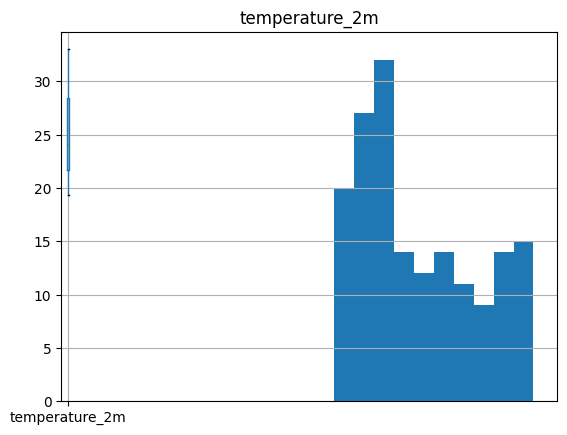

In [61]:
api_url = 'https://api.open-meteo.com/v1/forecast?latitude=-23.55&longitude=-46.63&hourly=temperature_2m&timezone=America/Sao_Paulo' # URL da API de previsão meteorológica
response = requests.get(api_url) # Fazendo a requisição HTTP
data = response.json() # Converte a resposta JSON para um dicionário

df_previsao = pd.DataFrame(data['hourly']) # Criando um DataFrame a partir da lista de previsões

print(df_previsao.hist())

print(df_previsao.boxplot())

In [74]:
from re import U

latitude = -23.55 # Latitude
longitude = -46.63 # Longitude

startdate = '2024-01-01' # Data inicial
enddate = '2024-12-31' # Data final

url = f'https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={startdate}&end_date={enddate}&hourly=temperature_2m&daily=precipitation_sum' # URL da API de dados climáticos
response = requests.get(url) # Fazendo a requisição HTTP
if response.status_code == 200: # Verifica se a requisição foi bem-sucedida
    data = response.json() # Converte a resposta JSON para um dicionário
    hourly_data = data.get('hourly', {}) # Obtém os dados horários
    daily_data = data.get('daily', {}) # Obtém os dados diários

    time_hourly = hourly_data.get('time', []) # Obtém as datas dos dados horários
    temp_hourly = hourly_data.get('temperature_2m', []) # Obtém as temperaturas dos dados horários

    time_daily = daily_data.get('time', []) # Obtém as datas dos dados diários
    precip_daily = daily_data.get('precipitation_sum', []) # Obtém as precipitações dos dados diários

    df_hourly = pd.DataFrame({'datetime': time_hourly, 'temperature_2m': temp_hourly}) # Criando um DataFrame a partir dos dados horários
    df_daily = pd.DataFrame({'date': time_daily, 'precipitation_sum': precip_daily}) # Criando um DataFrame a partir dos dados diários

    print(df_hourly)
    
else:
    print('Deu Merda na requisição.')
    print(response.status_code)

df_hourly

df_hourly.to_csv('teno2024houly.csv', index=False) # Salvando o DataFrame em um CSV com nome 'teno2024hourly.csv'



              datetime  temperature_2m
0     2024-01-01T00:00            19.4
1     2024-01-01T01:00            18.6
2     2024-01-01T02:00            18.3
3     2024-01-01T03:00            18.1
4     2024-01-01T04:00            18.1
...                ...             ...
8779  2024-12-31T19:00            25.2
8780  2024-12-31T20:00            24.7
8781  2024-12-31T21:00            24.5
8782  2024-12-31T22:00            23.2
8783  2024-12-31T23:00            22.5

[8784 rows x 2 columns]


In [ ]:
api_url = 'https://api.open-meteo.com/v1/forecast?latitude=-23.55&longitude=-46.63&hourly=temperature_2m&timezone=America/Sao_Paulo' 
# URL da API de previsão meteorológica

def pegadados(url): # Função para pegar dados de previsão meteorológica'
    response = requests.get(url) # Fazendo a requisição HTTP
    if response.status_code == 200: # Verifica se a requisição foi bem-sucedida
        data = response.json() # Converte a resposta JSON para um dicionário
        df = pd.DataFrame(data['hourly']) # Criando um DataFrame a partir da lista de previsões
        df = df.dropna(axis=1)       # Retirando as colunas que não contêm dados
        return df # Retorna o DataFrame de previsões meteorológicas
    else:
        return None # Retorna None caso a requisição falhe
    
df = pegadados(api_url) # Chamando a função para pegar os dados

df.to_csv('DadosCapturados.csv', index=False) # Salvando o DataFrame em um CSV com nome 'dadosCapturados.csv'